# K-Nearest-Neighbors

👇 Load the `houses_clean.csv` dataset located in the `data` folder, or use our URL [https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv).

In [118]:
import pandas as pd
data = pd.read_csv("./data/clean_dataset.csv")
X = data.copy().drop(columns=["SalePrice"])
y = data["SalePrice"]

ℹ️ The features are already preprocessed as you did it during the Data preparation day. The dataset description can be found [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt).

# Default KNN

🎯 The task is to predict the price of houses (`SalePrice`) with all the features.

👇 Use cross validation to evaluate a default KNNRegressor on such a task. What is the proportion of the variance in `SalePrice` that is explained by the features? Save your answer under variable name `base_knn_score`.

<details>
<summary> 💡 Hint </summary>
    <br>
    ℹ️ The proportion of the variance in the dependent variable that is explained by the independent variables is the R2 score.
</details>

In [119]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
# 5-Fold Cross validate model
model_knn = KNeighborsRegressor()
cv_results = cross_validate(model_knn, X, y, cv=5, scoring=['max_error','r2', 'neg_mean_absolute_error','neg_mean_squared_error'])
pd.DataFrame(cv_results) # Cross validation output
cv_results

{'fit_time': array([0.00402141, 0.00205421, 0.00180292, 0.00168562, 0.00155187]),
 'score_time': array([0.00316882, 0.00229597, 0.00258303, 0.00218773, 0.00209904]),
 'test_max_error': array([-174598., -367250., -290050., -277207., -363050.]),
 'test_r2': array([0.62529341, 0.62347538, 0.61062276, 0.64549026, 0.53827349]),
 'test_neg_mean_absolute_error': array([-32169.88082192, -32207.31780822, -33926.25958904, -28105.48082192,
        -36276.19041096]),
 'test_neg_mean_squared_error': array([-2.07311285e+09, -2.47401896e+09, -2.95062206e+09, -1.79589491e+09,
        -3.09604685e+09])}

In [120]:
base_knn_score = cv_results['test_r2'].mean()# Cross validation resultsbase_knn_score 
base_knn_score

0.6086310596745281

### ☑️ Check your code

In [121]:
from nbresult import ChallengeResult

result = ChallengeResult('default_score',
                         score = base_knn_score)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/mz/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/mz/code/MaCoZu/data-challenges/05-ML/03-Performance-metrics/01-KNN
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_default_score.py::TestDefault_score::test_score PASSED        [100%]

============================== 1 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/default_score.pickle

git commit -m 'Completed default_score step'

git push origin master


# Scale sensitivity

KNNs and distance based algorithms can be extremely sensitive to the scale of the features. 

👇 Rescale the feature set within an **exact common range**, and save it under a variable named `X_rescaled`. Then, evaluate a model on the rescaled features and save its score under variable name `rescaled_score`.

<details>
<summary> 💡 Hint </summary>
    
`MinMaxScaler()`

</details>




In [122]:
data_tmp = data.copy()
data_tmp.drop(columns="SalePrice", inplace = True)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir
0,0.38007,0.375,0.333333,0.500,1
1,-0.31209,0.375,0.333333,0.875,1


In [123]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler_1 = MinMaxScaler()

In [124]:
data_tmp.columns

Index(['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond',
       'CentralAir'],
      dtype='object')

In [127]:
X_rescaled = minmaxscaler_1.fit_transform(data_tmp)
#X_rescaled = pd.DataFrame(X_rescaled, columns = data_tmp.columns)
#X_rescaled.head()
X_rescaled

array([[0.30320751, 0.375     , 0.33333333, 0.5       , 1.        ],
       [0.22381712, 0.375     , 0.33333333, 0.875     , 1.        ],
       [0.31667553, 0.375     , 0.33333333, 0.5       , 1.        ],
       ...,
       [0.41485026, 0.5       , 0.33333333, 1.        , 1.        ],
       [0.19121035, 0.25      , 0.33333333, 0.625     , 1.        ],
       [0.22275385, 0.375     , 0.33333333, 0.625     , 1.        ]])

In [126]:
# 5-Fold Cross validate model
model_knn2 = KNeighborsRegressor()
cv_results2 = cross_validate(model_knn2, X_rescaled, y, cv=5, scoring=['max_error','r2', 'neg_mean_absolute_error','neg_mean_squared_error'])
pd.DataFrame(cv_results2) # Cross validation output
rescaled_score = cv_results2['test_r2'].mean()# Cross validation resultsbase_knn_score 
rescaled_score

0.6514912409729618

In [115]:
cv_results2

{'fit_time': array([0.00313354, 0.00323749, 0.00167561, 0.00154233, 0.0016048 ]),
 'score_time': array([0.00453973, 0.00379801, 0.00244474, 0.00238228, 0.0026834 ]),
 'test_max_error': array([-194600. , -379850. , -276050. , -181794.4, -318550. ]),
 'test_r2': array([0.62856603, 0.62454211, 0.68055759, 0.72992655, 0.59386393]),
 'test_neg_mean_absolute_error': array([-31594.46986301, -31986.83150685, -31660.26506849, -25882.23835616,
        -35041.04726027]),
 'test_neg_mean_squared_error': array([-2.05500666e+09, -2.46700979e+09, -2.42067007e+09, -1.36815293e+09,
        -2.72329244e+09])}

👉 The R2 score should have increased!

ℹ️ It is preferrable for features to be in an exact common range when modelling distance based algorithms. However, it does not always garantee a better score. It is a trial and error process.

### ☑️ Check your code

In [128]:
from nbresult import ChallengeResult

result = ChallengeResult('scale_sensitivity',
                         base_score = base_knn_score,
                         rescaled_features = X_rescaled,
                         rescaled_score = rescaled_score)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/mz/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/mz/code/MaCoZu/data-challenges/05-ML/03-Performance-metrics/01-KNN
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 2 items

tests/test_scale_sensitivity.py::TestScale_sensitivity::test_rescaled_features PASSED [ 50%]
tests/test_scale_sensitivity.py::TestScale_sensitivity::test_score_inscrease PASSED [100%]

============================== 2 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/scale_sensitivity.pickle

git commit -m 'Completed scale_sensitivity step'

git push origin master


# Optimizing $k$

👇 Fine tune the parameter K of a KNNRegressor on the rescaled features. Plot the evolution of the score as K increases from 2 until 25.

In [129]:
folds = range(2, 26)

In [133]:
score_evolve = []

for fold in folds:
    model_knn3 = KNeighborsRegressor(n_neighbors=fold)
    cv_results3 = cross_validate(model_knn3, X_rescaled, y, cv=5, scoring=['r2'])
    score_evolve.append(cv_results3["test_r2"].mean())

In [134]:
score_evolve

[0.6236926810559009,
 0.6352616637719477,
 0.6422019244504337,
 0.6514912409729618,
 0.6513414327031736,
 0.653498368366612,
 0.6538878983848023,
 0.6554496877049389,
 0.6549912458402671,
 0.6565589531722301,
 0.6543285292777353,
 0.6561232261437094,
 0.6532326796218018,
 0.6505191006910197,
 0.6502936520281124,
 0.6481414889552937,
 0.6461888179147917,
 0.6429293202008992,
 0.6428265943706425,
 0.6408652092473098,
 0.6398487386174528,
 0.6382604964203109,
 0.636369812913744,
 0.6352805930621008]

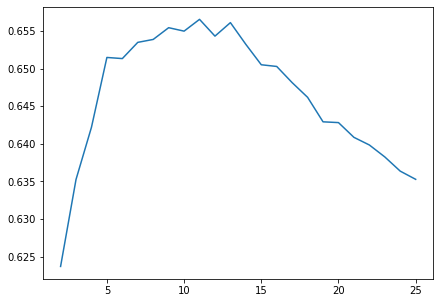

In [135]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.plot(folds, score_evolve);

❓ Which value of K produces the best performance? Save your answer under variable name `best_k`.

In [136]:
max(score_evolve)

0.6565589531722301

In [145]:
best_k = score_evolve.index(max(score_evolve))+2
best_k

11

<details>
<summary> 👉 Solution 👈</summary>
    
By looking at your graph, you should see that the score stops increasing around k = 5 and the maximum score is reached for k = 11.

</details>



❓ What is you interpretation of the poor performance of the model for values $k$ < 5?

<details>
<summary> 👉 Solution 👈</summary>
    
When K is too small, the model will tend to overfit to the training set. It will focus on too few points to be able to generalize well. Increasing K will give the model more examples to base its predictions on.

</details>



### ☑️ Check your code

In [146]:
from nbresult import ChallengeResult

result = ChallengeResult('optimal_k',
                         optimal_k = best_k)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/mz/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/mz/code/MaCoZu/data-challenges/05-ML/03-Performance-metrics/01-KNN
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_optimal_k.py::TestOptimal_k::test_optimal_K_around_10 PASSED  [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/optimal_k.pickle

git commit -m 'Completed optimal_k step'

git push origin master


# Overfitting a KNN 

ℹ️ When the parameter K of KNNs is too small, there is a risk of overfitting the training set and not being able to generalize well. 

👇 Plot the learning curves of a KNN with parameter K=2.

In [150]:
import numpy as np
from sklearn.model_selection import learning_curve

In [151]:
train_sizes = [25,50,75,100,250,500,750,1000,1150]

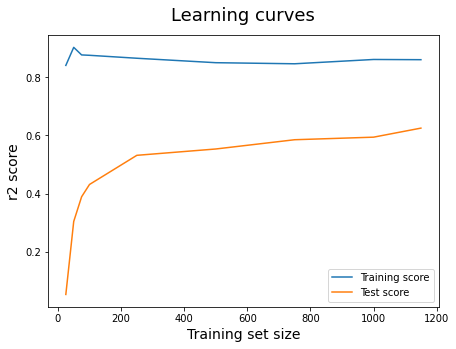

In [157]:
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = \
learning_curve(estimator=KNeighborsRegressor(n_neighbors=2), X=X_rescaled, y=y, train_sizes=train_sizes,cv=5)
# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(7,5));
plt.plot(train_sizes, train_scores_mean, label = 'Training score');
plt.plot(train_sizes, test_scores_mean, label = 'Test score');
plt.ylabel('r2 score', fontsize = 14);
plt.xlabel('Training set size', fontsize = 14);
plt.title('Learning curves', fontsize = 18, y = 1.03);
plt.legend(loc="best");
plt.show()

👉 You should observe a high training score, but a low testing score. ⚠️ Overfitting alert ⚠️ This is due to a parameter K that is too low.

# Ideal K

👇 This time, plot the learning curves for the ideal K value you found in the "Optimizing $k$" section.

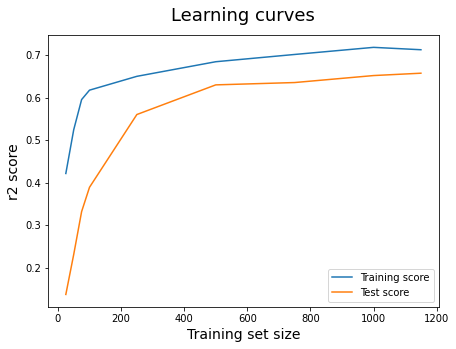

In [158]:
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes2, train_scores2, test_scores2 = \
learning_curve(estimator=KNeighborsRegressor(n_neighbors=11), X=X_rescaled, y=y, train_sizes=train_sizes,cv=5)
# Take the mean of cross-validated train scores and validation scores
train_scores_mean2 = np.mean(train_scores2, axis=1)
test_scores_mean2 = np.mean(test_scores2, axis=1)
plt.figure(figsize=(7,5));
plt.plot(train_sizes2, train_scores_mean2, label = 'Training score');
plt.plot(train_sizes2, test_scores_mean2, label = 'Test score');
plt.ylabel('r2 score', fontsize = 14);
plt.xlabel('Training set size', fontsize = 14);
plt.title('Learning curves', fontsize = 18, y = 1.03);
plt.legend(loc="best");
plt.show()

👉 The curves should be close to converging, which indicates that the model is overfitting less and generalizing better.

ℹ️ There are two key elements to remember when modelling with KNN models:
    1. Distance algorithms are extremely sensitive to the scale of features
    2. K must be tuned: it controls the tradeoff between performance, generalization, and overfitting

❓ What is the average difference between actual price and predicted price of the optimized KNN model? Compute your answer and save it under variable name `price_error`

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y,test_size = 0.3, random_state = 6)

In [186]:
model_knn4 = KNeighborsRegressor(n_neighbors=best_k).fit(X_train, y_train)

In [187]:
y_pred = model_knn4.predict(X_test)
len(y_pred)

438

In [188]:
len(X_test)

438

In [189]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
import math
# mse = mean_squared_error(y, y_pred)
# rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
price_error = -mae
price_error

-30340.87712743877

### ☑️ Check your code

In [176]:
from nbresult import ChallengeResult

result = ChallengeResult('price_error',
                         error = price_error)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/mz/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/mz/code/MaCoZu/data-challenges/05-ML/03-Performance-metrics/01-KNN
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_price_error.py::TestPrice_error::test_price_error_range PASSED [100%]

============================== 1 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/price_error.pickle

git commit -m 'Completed price_error step'

git push origin master


# Model Selection

❓ Which of those two models would you chose to perform the task of predicting house prices:
- The KNN model you just tuned
- A Linear Regression model

Save your answer as a string under variable name `best_model` as either "KNN" or "LinearReg".

<details>
<summary> 💡 Hint </summary>
    
To chose either or, you'll have to evaluate the score of a Linear Regression on the same task and compare it to the score of the KNN. Make sure you are comparing the same metrics!!

</details>




In [190]:
from sklearn.linear_model import LinearRegression
model_liear_reg = LinearRegression().fit(X_train, y_train)

cv_results_linear = cross_validate(model_liear_reg, X, y, scoring=['neg_mean_absolute_error'])b

In [192]:
cv_results_linear["test_neg_mean_absolute_error"].mean()

-33586.16906310641

In [193]:
best_model = "KNN"

ℹ️ When comparing either metric of both models, the KNN model should outperform the Linear Regression. This could be due to its ability to capture non-linear patterns in the data.

### ☑️ Check your code

In [194]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/mz/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/mz/code/MaCoZu/data-challenges/05-ML/03-Performance-metrics/01-KNN
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_best_model.py::TestBest_model::test_best_model PASSED         [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/best_model.pickle

git commit -m 'Completed best_model step'

git push origin master


# 🏁